In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from plotly import express as px
from plotly import graph_objects as go
import warnings

sns.set(style="whitegrid")

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel("Cleaned_Black_Money_Dataset_2013.xlsx")

df.head()


,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000004137,India,2.049673e+06,Stocks Transfer,2013-06-22 08:00:00,Person_518,Finance,Brazil,False,Illegal,6,8,Bank_81,Switzerland
1,TX0000006706,China,4.988322e+05,Property Purchase,2013-10-07 09:00:00,Person_6889,Luxury Goods,Russia,False,Illegal,8,8,Bank_194,Luxembourg
2,TX0000003539,Singapore,1.612514e+06,Offshore Transfer,2013-05-28 10:00:00,Person_820,Luxury Goods,South Africa,False,Illegal,7,7,Bank_207,Cayman Islands
3,TX0000006584,Singapore,3.458205e+06,Cash Withdrawal,2013-10-02 07:00:00,Person_7370,Luxury Goods,UAE,False,Legal,10,2,Bank_444,Bahamas
4,TX0000001994,UAE,1.136456e+05,Stocks Transfer,2013-03-25 01:00:00,Person_9308,Luxury Goods,China,False,Illegal,3,1,Bank_116,Panama


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Country,0
Amount (USD),0
Transaction Type,0
Date of Transaction,0
Person Involved,0
Industry,0
Destination Country,0
Reported by Authority,0
Source of Money,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               5000 non-null   object        
 1   Country                      5000 non-null   object        
 2   Amount (USD)                 5000 non-null   float64       
 3   Transaction Type             5000 non-null   object        
 4   Date of Transaction          5000 non-null   datetime64[ns]
 5   Person Involved              5000 non-null   object        
 6   Industry                     5000 non-null   object        
 7   Destination Country          5000 non-null   object        
 8   Reported by Authority        5000 non-null   bool          
 9   Source of Money              5000 non-null   object        
 10  Money Laundering Risk Score  5000 non-null   int64         
 11  Shell Companies Involved     5000 non-null 

In [ ]:
df.describe()

,Amount (USD),Date of Transaction,Money Laundering Risk Score,Shell Companies Involved
count,5.000000e+03,5000,5000.000000,5000.000000
mean,2.488943e+06,2013-07-02 15:55:55.920000,5.568000,4.481600
min,1.025862e+04,2013-01-01 01:00:00,1.000000,0.000000
25%,1.246987e+06,2013-04-03 00:15:00,3.000000,2.000000
50%,2.503840e+06,2013-07-02 10:00:00,6.000000,5.000000
75%,3.677454e+06,2013-10-01 13:15:00,8.000000,7.000000
max,4.999812e+06,2013-12-31 23:00:00,10.000000,9.000000
std,1.421644e+06,NaN,2.893692,2.860786


In [ ]:
# Feature Engineering: Add Month and Year of the Transaction
df['Transaction Month'] = df['Date of Transaction'].dt.month
df['Transaction Year'] = df['Date of Transaction'].dt.year

df.to_excel('Cleaned_Black_Money_Dataset_2013.xlsx')

df['Country Avg Transaction'] = df.groupby('Country')['Amount (USD)'].transform('mean')

df.head(5)

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Month,Transaction Year
0,TX0000004137,India,2.049673e+06,Stocks Transfer,2013-06-22 08:00:00,Person_518,Finance,Brazil,False,Illegal,6,8,Bank_81,Switzerland,6,2013
1,TX0000006706,China,4.988322e+05,Property Purchase,2013-10-07 09:00:00,Person_6889,Luxury Goods,Russia,False,Illegal,8,8,Bank_194,Luxembourg,10,2013
2,TX0000003539,Singapore,1.612514e+06,Offshore Transfer,2013-05-28 10:00:00,Person_820,Luxury Goods,South Africa,False,Illegal,7,7,Bank_207,Cayman Islands,5,2013
3,TX0000006584,Singapore,3.458205e+06,Cash Withdrawal,2013-10-02 07:00:00,Person_7370,Luxury Goods,UAE,False,Legal,10,2,Bank_444,Bahamas,10,2013
4,TX0000001994,UAE,1.136456e+05,Stocks Transfer,2013-03-25 01:00:00,Person_9308,Luxury Goods,China,False,Illegal,3,1,Bank_116,Panama,3,2013


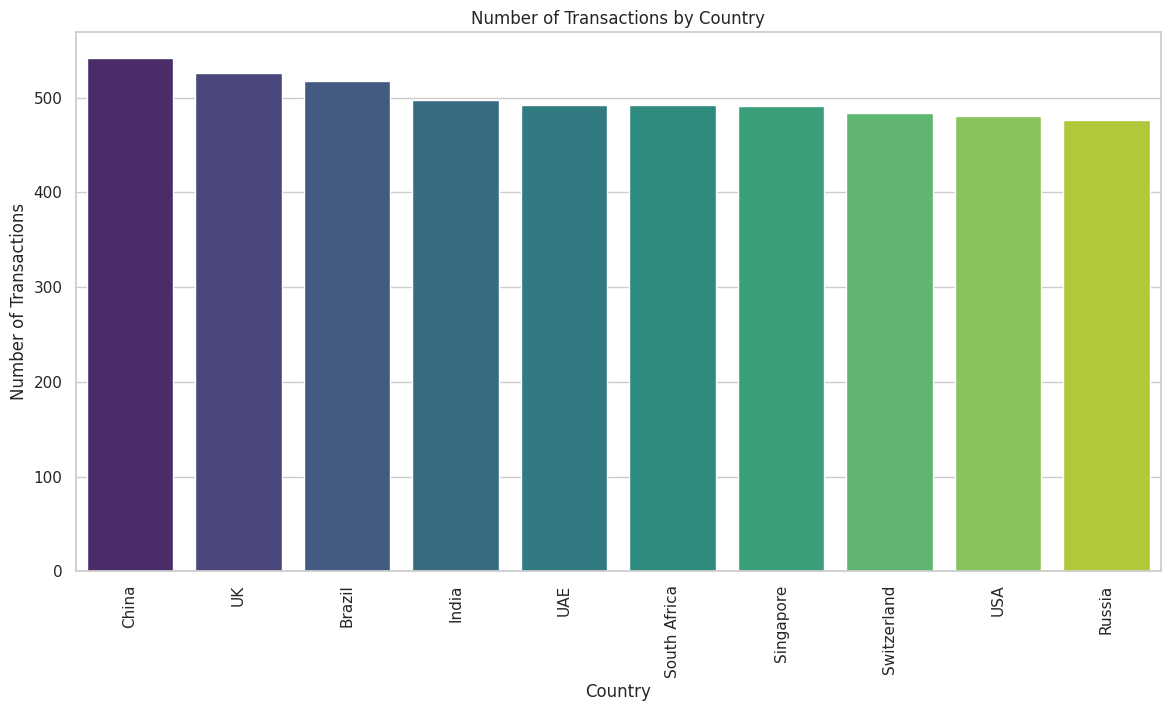

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index, palette='viridis')
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

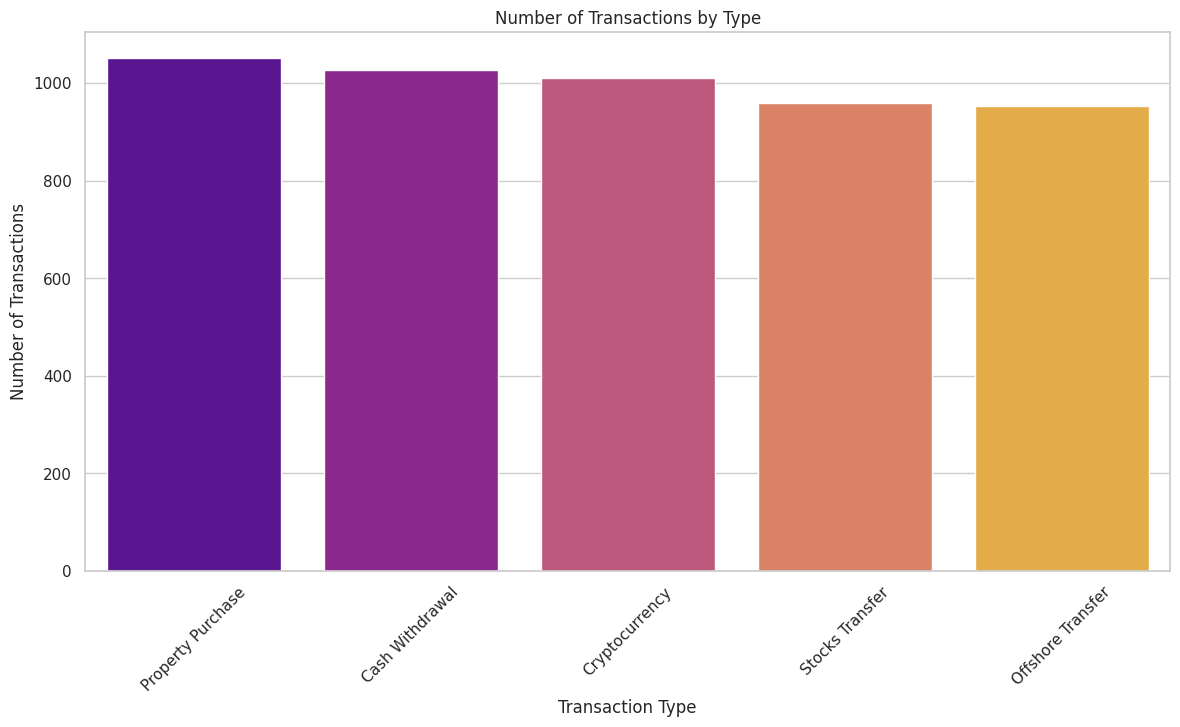

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Transaction Type', order=df['Transaction Type'].value_counts().index, palette='plasma')
plt.title('Number of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

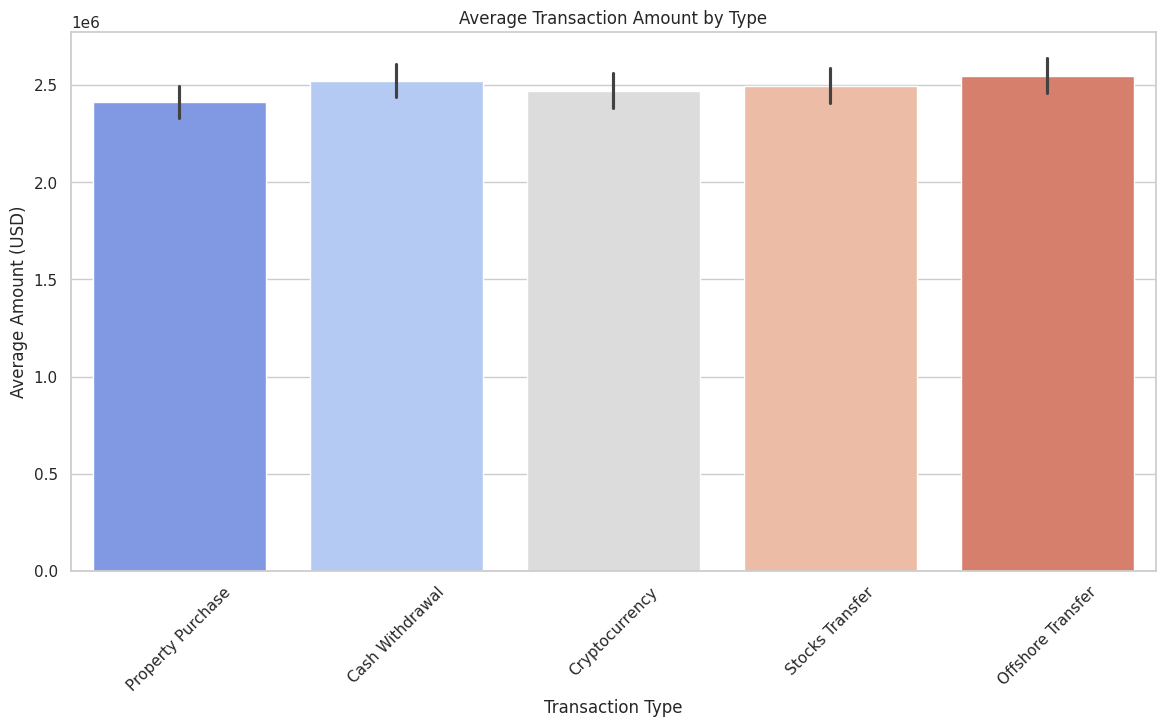

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='Transaction Type', y='Amount (USD)', estimator=np.mean, palette='coolwarm', order=df['Transaction Type'].value_counts().index)
plt.title('Average Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount (USD)')
plt.xticks(rotation=45)
plt.show()

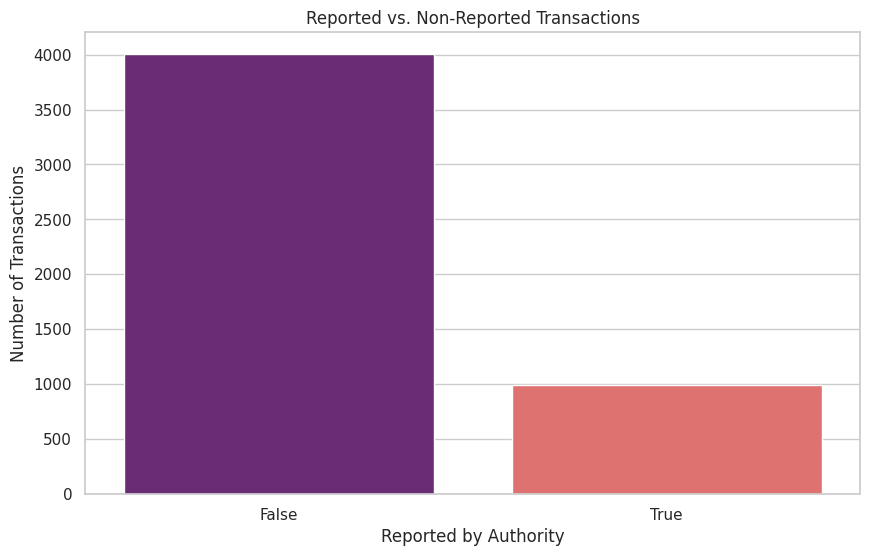

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Reported by Authority', palette='magma')
plt.title('Reported vs. Non-Reported Transactions')
plt.xlabel('Reported by Authority')
plt.ylabel('Number of Transactions')
plt.show()

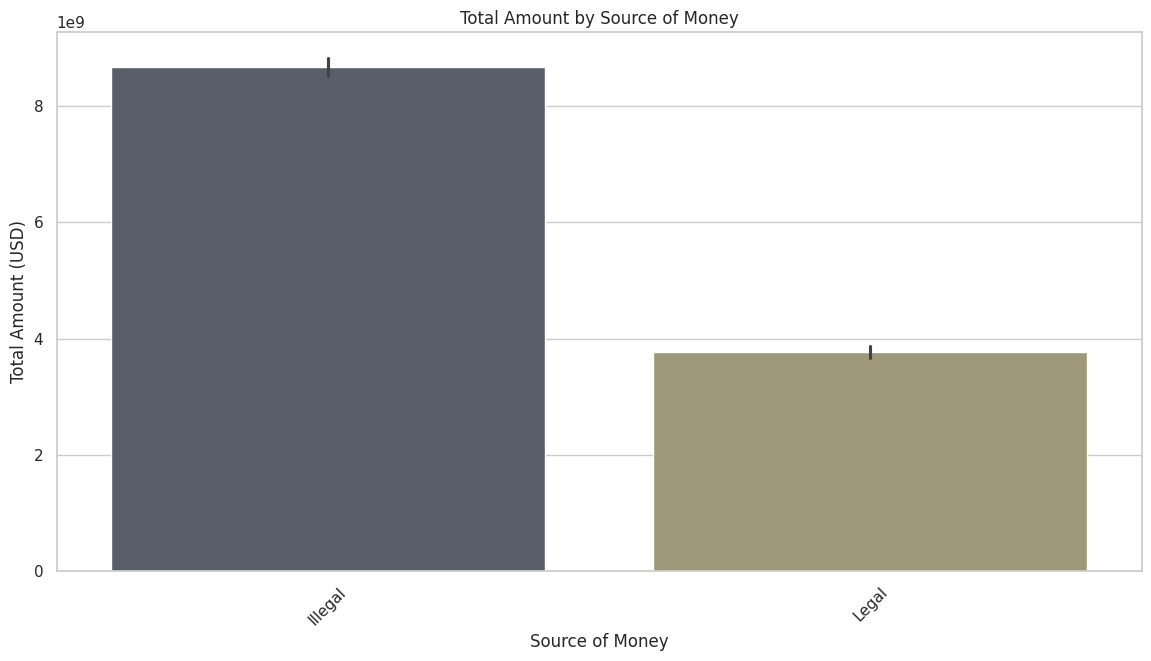

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='Source of Money', y='Amount (USD)', estimator=np.sum, palette='cividis', order=df['Source of Money'].value_counts().index)
plt.title('Total Amount by Source of Money')
plt.xlabel('Source of Money')
plt.ylabel('Total Amount (USD)')
plt.xticks(rotation=45)
plt.show()

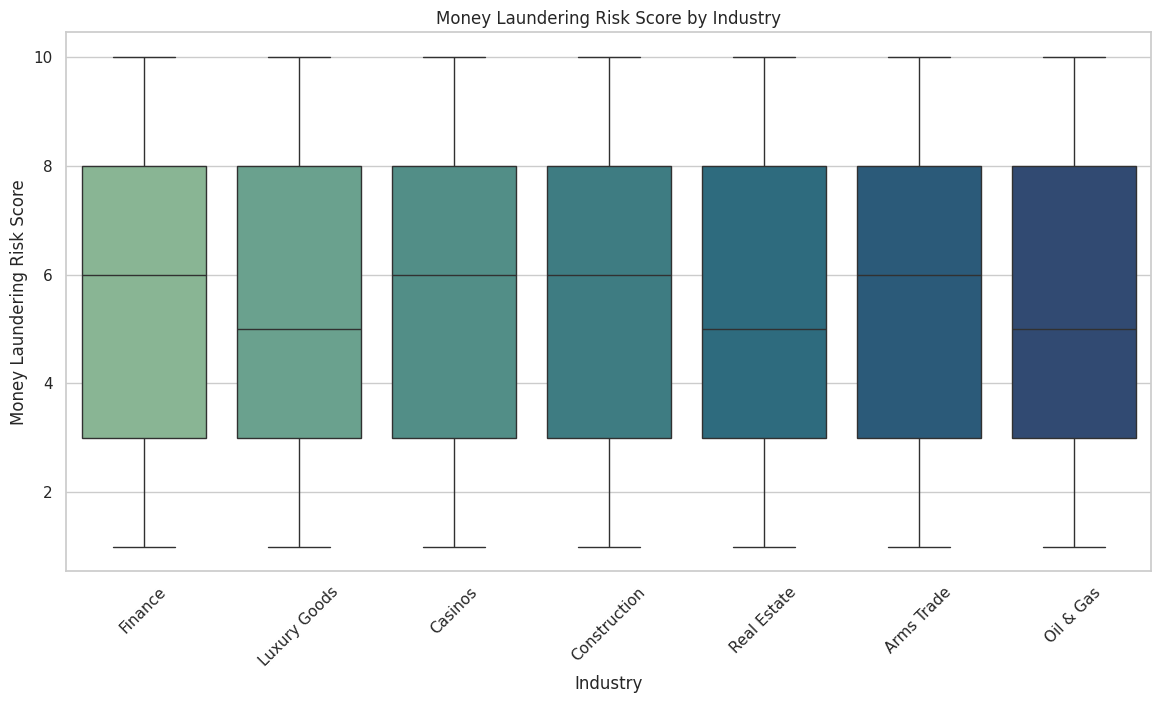

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Industry', y='Money Laundering Risk Score', palette='crest')
plt.title('Money Laundering Risk Score by Industry')
plt.xlabel('Industry')
plt.ylabel('Money Laundering Risk Score')
plt.xticks(rotation=45)
plt.show()

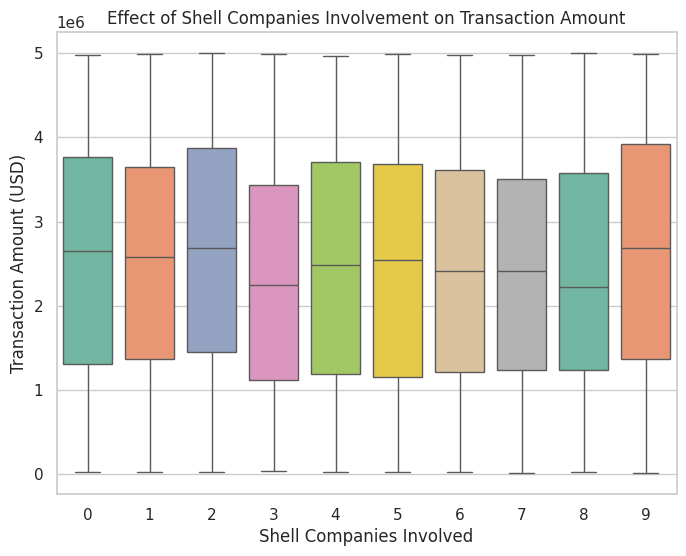

In [ ]:
# Box plot for Shell Companies Involved vs. Transaction Amount
plt.figure(figsize=(8, 6))
sns.boxplot( data=df,x='Shell Companies Involved', y='Amount (USD)', palette='Set2')
plt.title("Effect of Shell Companies Involvement on Transaction Amount")
plt.xlabel("Shell Companies Involved")
plt.ylabel("Transaction Amount (USD)")
plt.show()


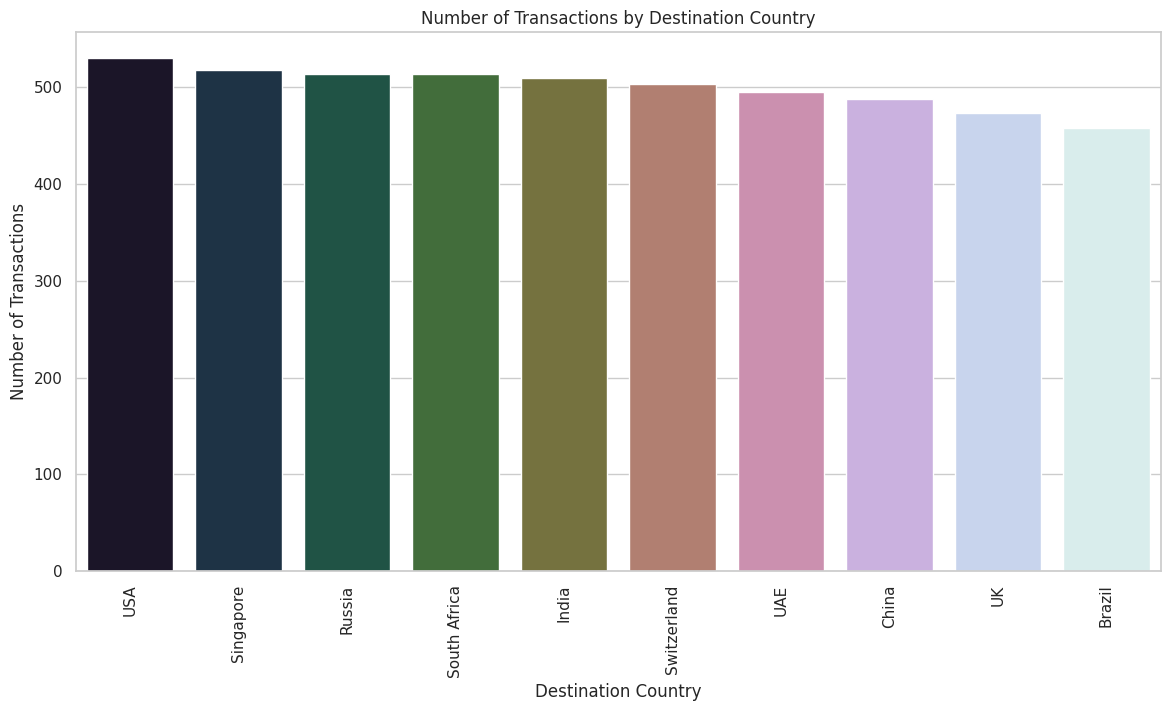

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Destination Country', order=df['Destination Country'].value_counts().index, palette='cubehelix')
plt.title('Number of Transactions by Destination Country')
plt.xlabel('Destination Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

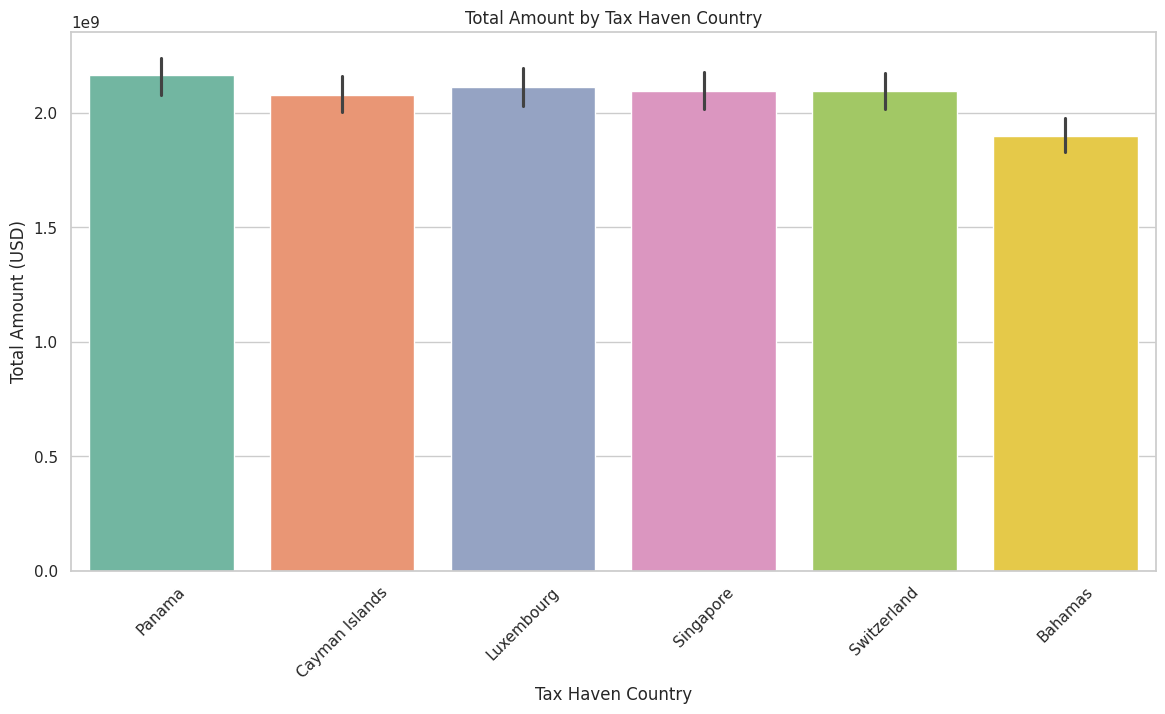

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='Tax Haven Country', y='Amount (USD)', estimator=np.sum, palette='Set2', order=df['Tax Haven Country'].value_counts().index)
plt.title('Total Amount by Tax Haven Country')
plt.xlabel('Tax Haven Country')
plt.ylabel('Total Amount (USD)')
plt.xticks(rotation=45)
plt.show()

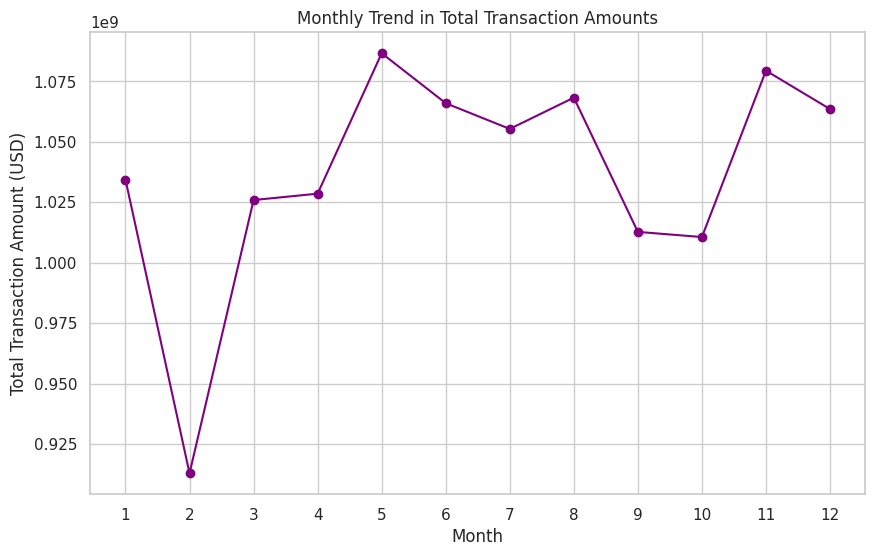

In [ ]:
# Monthly total transaction amount
monthly_trend = df.groupby('Transaction Month')['Amount (USD)'].sum()

# Plot the monthly trend
plt.figure(figsize=(10, 6))
monthly_trend.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Trend in Total Transaction Amounts")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount (USD)")
plt.xticks(range(1, 13))
plt.show()



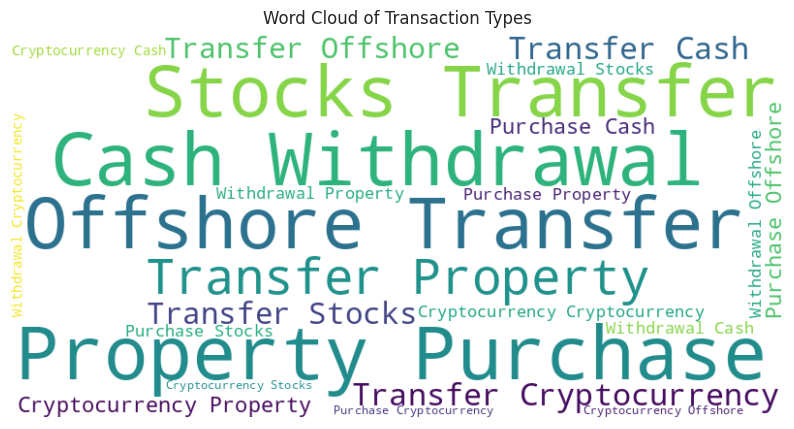

In [ ]:
# Combine all text in the 'Transaction Type' column into a single string
text = ' '.join(df['Transaction Type'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_width=1.5, contour_color='steelblue').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Transaction Types")
plt.show()


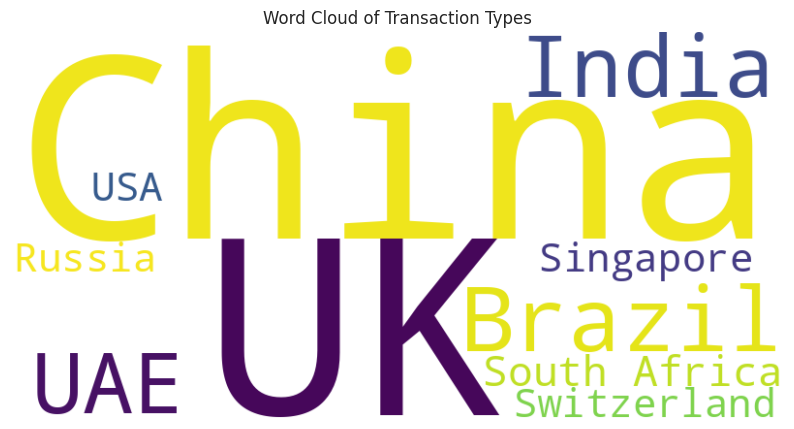

In [ ]:
# Combine all text in the 'Transaction Type' column into a single string
text = ' '.join(df['Country'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_width=1.5, contour_color='steelblue').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Transaction Types")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

df = df[['Country', 'Amount (USD)', 'Transaction Type', 'Date of Transaction',
            'Money Laundering Risk Score', 'Shell Companies Involved']]

df['Country Avg Transaction'] = df.groupby('Country')['Amount (USD)'].transform('mean')

# Apply log transformation to the target variable to reduce skewness
df['Log Amount (USD)'] = np.log1p(df['Amount (USD)'])  # +1 to handle zero values if any

# Standardize numerical columns
#scaler = StandardScaler()
#df[['Money Laundering Risk Score', 'Shell Companies Involved', 'Country Avg Transaction']] = scaler.fit_transform(
#    df[['Money Laundering Risk Score', 'Shell Companies Involved', 'Country Avg Transaction']]
#)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features with Label Encoding
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Transaction Type'] = label_encoder.fit_transform(df['Transaction Type'])


In [ ]:
# Example: Bin 'Money Laundering Risk Score' into categories
df['Risk Category'] = pd.cut(df['Money Laundering Risk Score'], bins=[-np.inf, 3, 6, 9, np.inf],
                               labels=['Low', 'Medium', 'High', 'Very High'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprocessing and feature engineering
df = df[['Country', 'Amount (USD)', 'Transaction Type', 'Date of Transaction',
         'Money Laundering Risk Score', 'Shell Companies Involved']]

df['Country Avg Transaction'] = df.groupby('Country')['Amount (USD)'].transform('mean')

# Apply log transformation to the target variable to reduce skewness
df['Log Amount (USD)'] = np.log1p(df['Amount (USD)'])  # +1 to handle zero values if any

# Encode categorical features with Label Encoding
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Transaction Type'] = label_encoder.fit_transform(df['Transaction Type'])

# Bin 'Money Laundering Risk Score' into categories
df['Risk Category'] = pd.cut(df['Money Laundering Risk Score'], bins=[-np.inf, 3, 6, 9, np.inf],
                               labels=['Low', 'Medium', 'High', 'Very High'])

# Encode 'Risk Category' with Label Encoding
df['Risk Category'] = label_encoder.fit_transform(df['Risk Category'])

# Optional: Create a mapping dictionary to see the country-to-numeric mappings
country_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Country to Numeric Mapping:\n", country_mapping)

# Display the updated DataFrame to confirm changes
print(df.head())

# Split data into features (X) and target (y)
X = df.drop(columns=['Date of Transaction', 'Amount (USD)'])
y = df['Log Amount (USD)']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Country to Numeric Mapping:
 {'High': 0, 'Low': 1, 'Medium': 2, 'Very High': 3}
   Country  Amount (USD)  Transaction Type Date of Transaction  \
0        2  2.049673e+06                 4 2013-06-22 08:00:00   
1        1  4.988322e+05                 3 2013-10-07 09:00:00   
2        4  1.612514e+06                 2 2013-05-28 10:00:00   
3        4  3.458205e+06                 0 2013-10-02 07:00:00   
4        7  1.136456e+05                 4 2013-03-25 01:00:00   

   Money Laundering Risk Score  Shell Companies Involved  \
0                            6                         8   
1                            8                         8   
2                            7                         7   
3                           10                         2   
4                            3                         1   

   Country Avg Transaction  Log Amount (USD)  Risk Category  
0             2.388374e+06         14.533191              2  
1             2.541039e+06         13.

In [ ]:
# Train a Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = gbr_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Reverse log transformation to get predictions in the original scale

# Evaluate the model
mae = mean_absolute_error(np.expm1(y_test), y_pred)
mse = mean_squared_error(np.expm1(y_test), y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(np.expm1(y_test), y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 10726.294870551095
Mean Squared Error (MSE): 229651083.7071258
Root Mean Squared Error (RMSE): 15154.243092517878
R-squared (R²): 0.9998888617144425


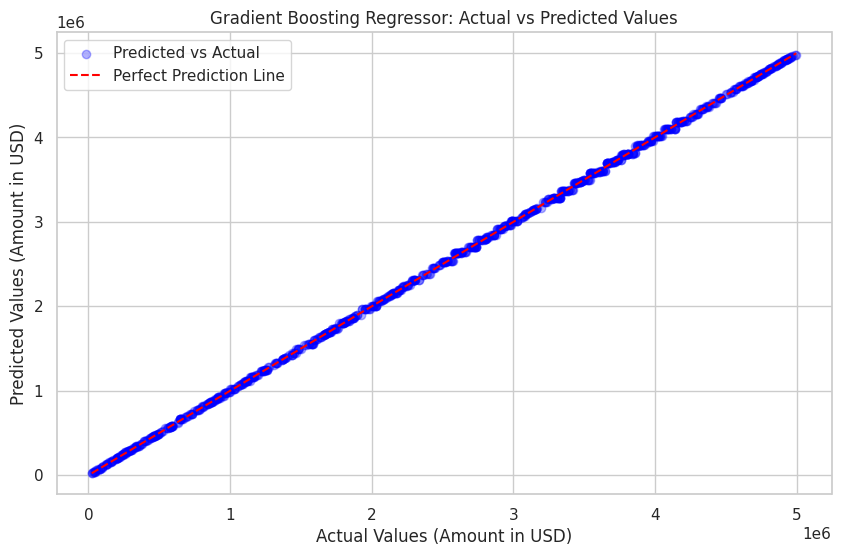

In [ ]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test), y_pred, alpha=0.3, color='blue', label='Predicted vs Actual')
plt.plot([min(np.expm1(y_test)), max(np.expm1(y_test))], [min(np.expm1(y_test)), max(np.expm1(y_test))], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Values')
plt.xlabel('Actual Values (Amount in USD)')
plt.ylabel('Predicted Values (Amount in USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder, StandardScaler
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#
## Assuming 'Country' is the column name for country names in the dataset
#label_encoder = LabelEncoder()
#
## Apply Label Encoding to the 'Country' column
#df['Country'] = label_encoder.fit_transform(df['Country'])
#
## Optional: Create a mapping dictionary to see the country-to-numeric mappings
#country_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
#print("Country to Numeric Mapping:\n", country_mapping)
#
## Display the updated DataFrame to confirm changes
#df.head()
#
#
## Split data into features (X) and target (y)
#X = df.drop(columns=['Date of Transaction', 'Amount (USD)'])
#y = np.log1p(df['Amount (USD)'])
#
## Split into training and testing sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
## Standardize the features
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)